Name: Abdul Sami Asif
Student Id: 2455657

In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import time

In [49]:
chessboard = cv2.imread('chessboard.png')
chessboard_rot = cv2.imread('chessboardrotated.png')
lab = cv2.imread('lab.png')
lab_rot = cv2.imread('labrotated.png')
agac = cv2.imread('agac.png')
agac_rot = cv2.imread('agacrotated.png')


In [50]:
def non_max(matrix,window_size):
    mid=int(window_size/2)
    for y in range(5,len(matrix)-5):
        for x in range(5,len(matrix[0])-5):
            max_val = 0
            y_index = 0
            x_index = 0
            for u in range(-5,6):
                for v in range(-5,6):
                    if matrix[y+u][x+v] >= max_val:
                        max_val = matrix[y+u][x+v]
                        y_index = y+u
                        x_index = x+v
                    matrix[y+u][x+v] = 0            
            matrix[y_index][x_index] = max_val
    return matrix        

### Task 1: Naive Formula + Uniform Weighting

In [51]:
def task1(original_img):
    
    img_copy = original_img.copy()
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    black_image = np.zeros((gray.shape[0], gray.shape[1], 3), np.uint8)

    harris = np.zeros(gray.shape)
    directions = [(1, 1), (1, 0), (1, -1), (0, 1), (0, -1), (-1, 1), (-1, 0), (-1, -1)]
    # Center Start from (2,2) No Padding Needed Avoiding the extreme corners of image
    for y in range(2,len(gray)-2):
        for x in range(2,len(gray[0])-2):
            E_total = 0
            Ixy = gray[y-1:y+2, x-1:x+2]
            # For each 8 direction
            for (u,v) in directions:
                Ixy_uv = gray[y+u-1:y+u+2, x+v-1: x+v+2] 
                d_2 = np.square(np.subtract(Ixy_uv,Ixy))
                E_total += np.sum(d_2)
            harris[y][x] = E_total
            
    flat_image = harris.flatten()
    corner_indices_1d = np.argsort(flat_image)[-10:]
    x_indices, y_indices = np.unravel_index(corner_indices_1d, harris.shape)
    for x, y, in zip(x_indices, y_indices):
        cv2.circle(img_copy, (y,x), 2, (255, 0, 0), -1)
        cv2.circle(black_image, (y,x), 2, (255, 255, 255), -1)
    
    return img_copy,black_image

Time Taken For Processing Chessboard 8.333632
Time Taken For Processing Rotated Chessboard 15.803447
Time Taken For Processing Agac 6.416261
Time Taken For Processing Rotated Agac 5.266202
Time Taken For Processing Lab 4.873947
Time Taken For Processing Rotated Lab 6.123658


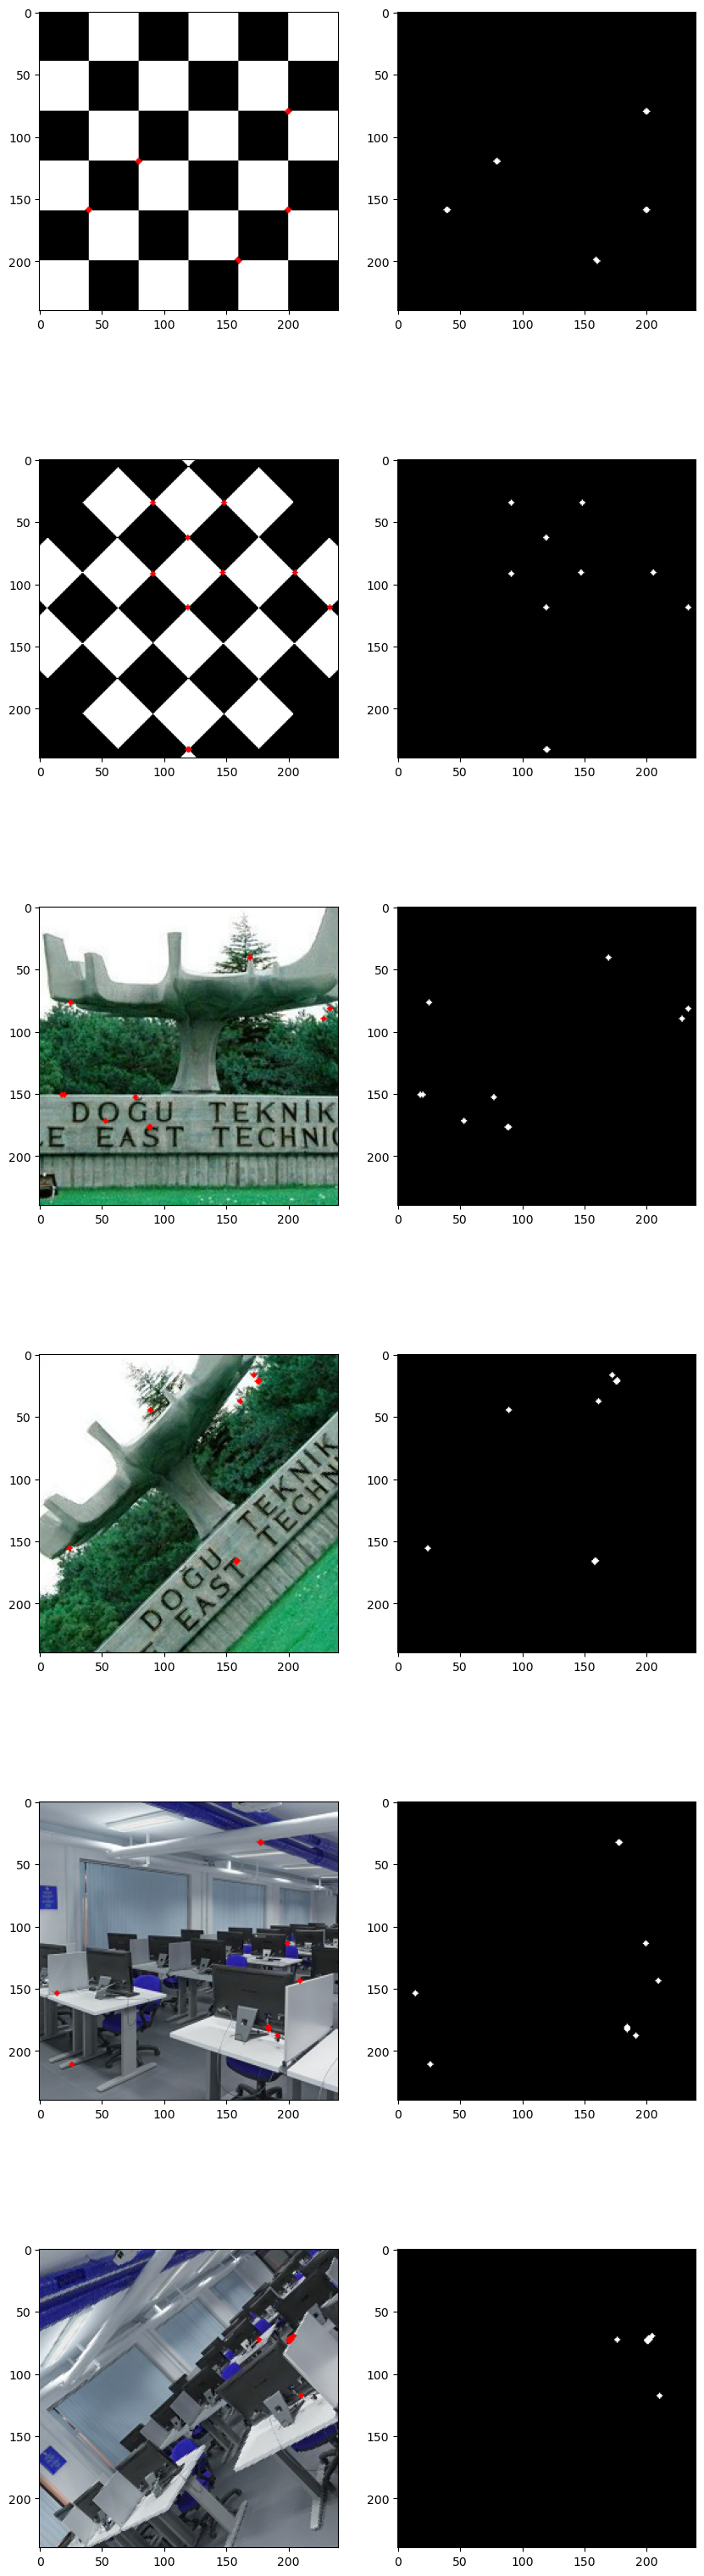

In [52]:
fig = plt.figure(figsize=(10,40))

rows = 6
columns = 2

fig.add_subplot(rows, columns, 1)
time_start = time.time()
im1,im2=task1(chessboard)
plt.imshow(im1)
time_end = time.time()
fig.add_subplot(rows, columns, 2)
plt.imshow(im2)

print('Time Taken For Processing Chessboard %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 3)
time_time_start = time.time()
im3,im4=task1(chessboard_rot)
plt.imshow(im3)
time_end = time.time()
fig.add_subplot(rows, columns, 4)
plt.imshow(im4)
print('Time Taken For Processing Rotated Chessboard %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 5)
time_start = time.time()
im5,im6=task1(agac)
plt.imshow(im5)
time_end = time.time()
fig.add_subplot(rows, columns, 6)
plt.imshow(im6)

print('Time Taken For Processing Agac %f' % (time_end-time_start))


fig.add_subplot(rows, columns, 7)
time_start = time.time()
im7,im8=task1(agac_rot)
plt.imshow(im7)
time_end = time.time()
fig.add_subplot(rows, columns, 8)
plt.imshow(im8)

print('Time Taken For Processing Rotated Agac %f' % (time_end-time_start))


fig.add_subplot(rows, columns, 9)
time_start = time.time()
im9,im10=task1(lab)
plt.imshow(im9)
time_end = time.time()
fig.add_subplot(rows, columns, 10)
plt.imshow(im10)

print('Time Taken For Processing Lab %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 11)
time_start = time.time()
im11,im12=task1(lab_rot)
plt.imshow(im11)
time_end = time.time()
fig.add_subplot(rows, columns, 12)
plt.imshow(im12)

print('Time Taken For Processing Rotated Lab %f' % (time_end-time_start))

##### There is Overlapping in results due to no use of maximum supression. Method is relatively slow. Variant to rotation


### Task2: Naive Formula + Uniform Weighting + Non-Maximum Suppression

In [53]:
def task2(original_img):
    img_copy = original_img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    black_image = np.zeros((img_gray.shape[0], img_gray.shape[1], 3), np.uint8)

    harris = np.zeros(img_gray.shape)
    directions = [(1, 1), (1, 0), (1, -1), (0, 1), (0, -1), (-1, 1), (-1, 0), (-1, -1)]
    for y in range(2,len(img_gray)-2):
        for x in range(2,len(img_gray[0])-2):
            total_sum = 0
            Ixy = img_gray[y-1:y+2, x-1:x+2]
            for (u,v) in directions:
                Ixy_uv = img_gray[y+u-1:y+u+2, x+v-1: x+v+2] 
                diff_squared = np.square(np.subtract(Ixy_uv,Ixy))
                total_sum += np.sum(diff_squared)
            harris[y][x] = total_sum
 
    
    # Code segment for taking the top 10 scores and paint a circle on the pixel that is selected to be a corner
    harris=non_max(harris,10)   
    flat_image = harris.flatten()
    corner_indices_1d = np.argsort(flat_image)[-10:]
    x_indices, y_indices = np.unravel_index(corner_indices_1d, harris.shape)
    for x, y, in zip(x_indices, y_indices):
        cv2.circle(img_copy, (y,x), 2, (255, 0, 0), -1)
        cv2.circle(black_image, (y,x), 2, (255, 255, 255), -1)
    
    return img_copy,black_image



Time Taken For Processing Chessboard 17.978617
Time Taken For Processing Rotated Chessboard 30.820477
Time Taken For Processing Agac 13.028303
Time Taken For Processing Rotated Agac 17.611398
Time Taken For Processing Lab 14.445771
Time Taken For Processing Rotated Lab 14.867218


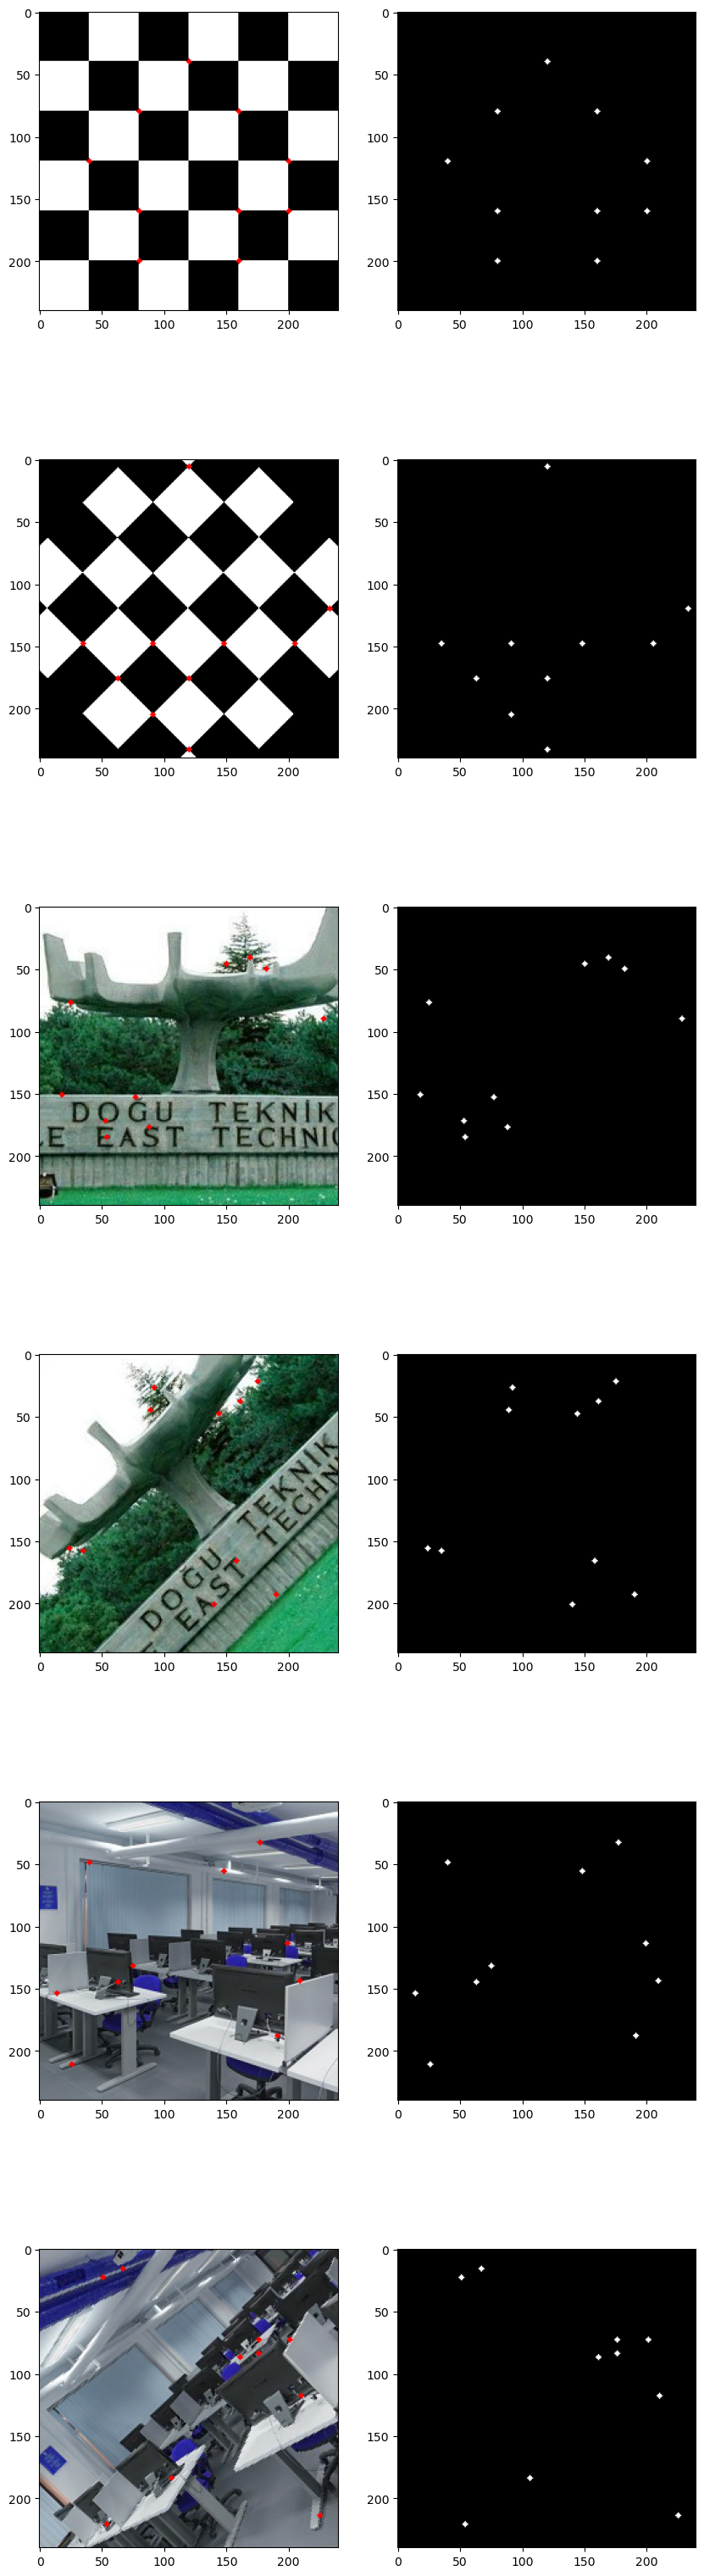

In [54]:
fig = plt.figure(figsize=(10,40))

rows = 6
columns = 2

fig.add_subplot(rows, columns, 1)
time_start = time.time()
im1,im2=task2(chessboard)
plt.imshow(im1)
time_end = time.time()
fig.add_subplot(rows, columns, 2)
plt.imshow(im2)

print('Time Taken For Processing Chessboard %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 3)
time_time_start = time.time()
im3,im4=task2(chessboard_rot)
plt.imshow(im3)
time_end = time.time()
fig.add_subplot(rows, columns, 4)
plt.imshow(im4)
print('Time Taken For Processing Rotated Chessboard %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 5)
time_start = time.time()
im5,im6=task2(agac)
plt.imshow(im5)
time_end = time.time()
fig.add_subplot(rows, columns, 6)
plt.imshow(im6)

print('Time Taken For Processing Agac %f' % (time_end-time_start))


fig.add_subplot(rows, columns, 7)
time_start = time.time()
im7,im8=task2(agac_rot)
plt.imshow(im7)
time_end = time.time()
fig.add_subplot(rows, columns, 8)
plt.imshow(im8)

print('Time Taken For Processing Rotated Agac %f' % (time_end-time_start))


fig.add_subplot(rows, columns, 9)
time_start = time.time()
im9,im10=task2(lab)
plt.imshow(im9)
time_end = time.time()
fig.add_subplot(rows, columns, 10)
plt.imshow(im10)

print('Time Taken For Processing Lab %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 11)
time_start = time.time()
im11,im12=task2(lab_rot)
plt.imshow(im11)
time_end = time.time()
fig.add_subplot(rows, columns, 12)
plt.imshow(im12)

print('Time Taken For Processing Rotated Lab %f' % (time_end-time_start))

##### There is no Overlapping in results due to use of maximum supression. Method is even slower then previous one. Variant to rotation.


### Task3: Taylor's Approximation + Uniform Weighting + Non-Maximum Suppression

In [56]:
def task3(original_img):
    
    img_copy = original_img.copy()
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    black_image = np.zeros((gray.shape[0], gray.shape[1], 3), np.uint8)
    filter_x = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])
    filter_y = np.array([
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]
    ])
    filter_x=filter_x/3
    filter_y=filter_y/3
    dx=convolve2d(gray,filter_x,mode="same",boundary="symm")
    dy=convolve2d(gray,filter_y,mode="same",boundary="symm")
    Sxx=np.square(dx)
    Syy=np.square(dy)
    Sxy=dx*dy
    harris = np.zeros(gray.shape)
    directions = [(1, 1), (1, 0), (1, -1), (0, 1), (0, -1), (-1, 1), (-1, 0), (-1, -1)]
    for y in range(2,len(gray)-2):
        for x in range(2,len(gray[0])-2):
            E_total = 0
            Ixx=np.sum(Sxx[y-2:y+3, x-2:x+3])
            Iyy=np.sum(Syy[y-2:y+3, x-2:x+3])
            Ixy=np.sum(Sxy[y-2:y+3, x-2:x+3])
            Matrix_H=np.array([[Ixx,Ixy],[Ixy,Iyy]])
            # For each 8 direction
            for (u,v) in directions:
                array1=np.array([u,v])
                array2=np.array([[u],[v]])
                E_total += np.matmul(np.matmul(array1,Matrix_H),array2)[0]
            harris[y][x] = E_total
    
    harris=non_max(harris,10)   
    flat_image = harris.flatten()
    corner_indices_1d = np.argsort(flat_image)[-10:]
    x_indices, y_indices = np.unravel_index(corner_indices_1d, harris.shape)
    for x, y, in zip(x_indices, y_indices):
        cv2.circle(img_copy, (y,x), 2, (255, 0, 0), -1)
        cv2.circle(black_image, (y,x), 2, (255, 255, 255), -1)
    
    return img_copy,black_image

Time Taken For Processing Chessboard 21.923184
Time Taken For Processing Rotated Chessboard 42.458517
Time Taken For Processing Agac 18.914704
Time Taken For Processing Rotated Agac 19.369818
Time Taken For Processing Lab 15.333037
Time Taken For Processing Rotated Lab 19.905316


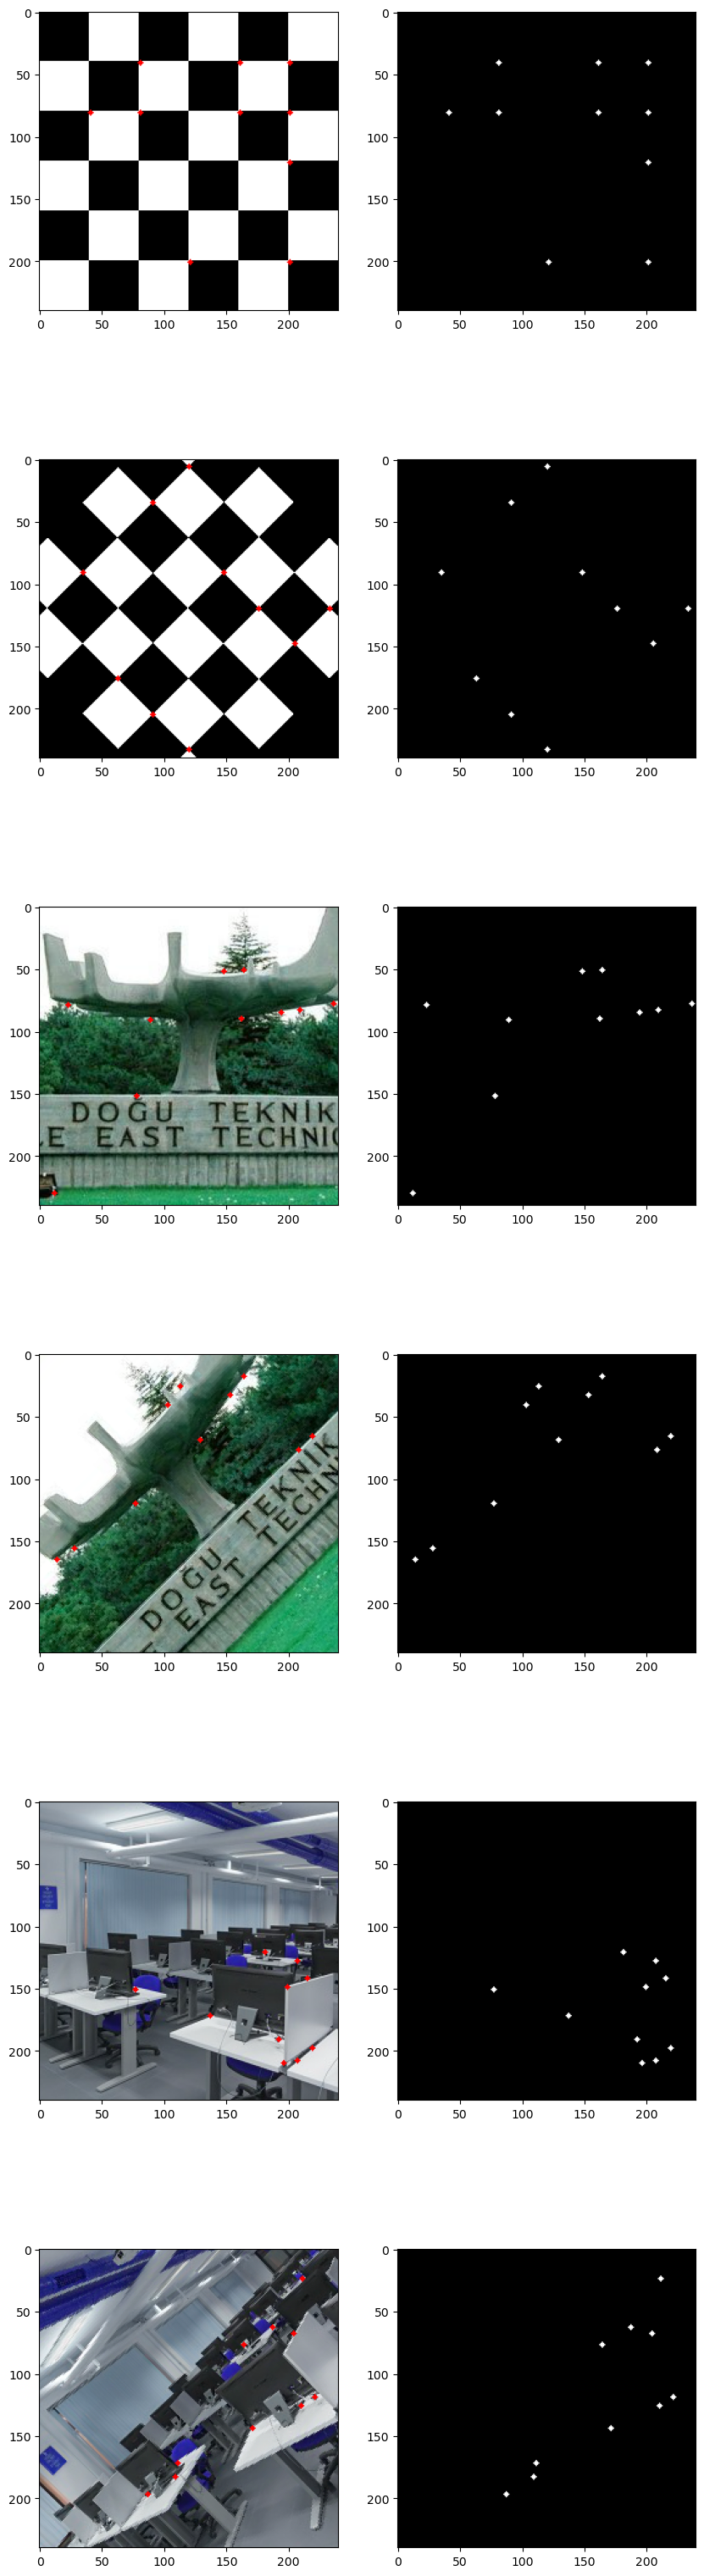

In [57]:
fig = plt.figure(figsize=(10,40))

rows = 6
columns = 2

fig.add_subplot(rows, columns, 1)
time_start = time.time()
im1,im2=task3(chessboard)
plt.imshow(im1)
time_end = time.time()
fig.add_subplot(rows, columns, 2)
plt.imshow(im2)

print('Time Taken For Processing Chessboard %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 3)
time_time_start = time.time()
im3,im4=task3(chessboard_rot)
plt.imshow(im3)
time_end = time.time()
fig.add_subplot(rows, columns, 4)
plt.imshow(im4)
print('Time Taken For Processing Rotated Chessboard %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 5)
time_start = time.time()
im5,im6=task3(agac)
plt.imshow(im5)
time_end = time.time()
fig.add_subplot(rows, columns, 6)
plt.imshow(im6)

print('Time Taken For Processing Agac %f' % (time_end-time_start))


fig.add_subplot(rows, columns, 7)
time_start = time.time()
im7,im8=task3(agac_rot)
plt.imshow(im7)
time_end = time.time()
fig.add_subplot(rows, columns, 8)
plt.imshow(im8)

print('Time Taken For Processing Rotated Agac %f' % (time_end-time_start))


fig.add_subplot(rows, columns, 9)
time_start = time.time()
im9,im10=task3(lab)
plt.imshow(im9)
time_end = time.time()
fig.add_subplot(rows, columns, 10)
plt.imshow(im10)

print('Time Taken For Processing Lab %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 11)
time_start = time.time()
im11,im12=task3(lab_rot)
plt.imshow(im11)
time_end = time.time()
fig.add_subplot(rows, columns, 12)
plt.imshow(im12)

print('Time Taken For Processing Rotated Lab %f' % (time_end-time_start))

##### There is no Overlapping in results due to use of maximum supression. Method is relatively slower. Variant to rotation.


### Task 4: Smaller Eigenvalue as corner score + Uniform Weighting + Non-Maximum Suppression

In [58]:
def task4(original_img):
    
    img_copy = original_img.copy()
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    black_image = np.zeros((gray.shape[0], gray.shape[1], 3), np.uint8)
    filter_x = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])
    filter_y = np.array([
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]
    ])
    filter_x=filter_x/3
    filter_y=filter_y/3
    dx=convolve2d(gray,filter_x,mode="same",boundary="symm")
    dy=convolve2d(gray,filter_y,mode="same",boundary="symm")
    Sxx=np.square(dx)
    Syy=np.square(dy)
    Sxy=dx*dy
    harris = np.zeros(gray.shape)
    directions = [(1, 1), (1, 0), (1, -1), (0, 1), (0, -1), (-1, 1), (-1, 0), (-1, -1)]
    for y in range(2,len(gray)-2):
        for x in range(2,len(gray[0])-2):
            E_total = 0
            Ixx=np.sum(Sxx[y-1:y+2, x-1:x+2])
            Iyy=np.sum(Syy[y-1:y+2, x-1:x+2])
            Ixy=np.sum(Sxy[y-1:y+2, x-1:x+2])
            Matrix_H=np.array([[Ixx,Ixy],[Ixy,Iyy]])
            eigen_vals = np.linalg.eigvals(Matrix_H)

            if eigen_vals[0] > eigen_vals[1]:
                if eigen_vals[1] > 2:
                    harris[y][x] = eigen_vals[1]
            else:
                if eigen_vals[0] > 2:
                    harris[y][x] = eigen_vals[0]

    harris=non_max(harris,10)   
    flat_image = harris.flatten()
    corner_indices_1d = np.argsort(flat_image)[-10:]
    x_indices, y_indices = np.unravel_index(corner_indices_1d, harris.shape)
    for x, y, in zip(x_indices, y_indices):
        cv2.circle(img_copy, (y,x), 2, (255, 0, 0), -1)
        cv2.circle(black_image, (y,x), 2, (255, 255, 255), -1)
    
    return img_copy,black_image

Time Taken For Processing Chessboard 15.967756
Time Taken For Processing Rotated Chessboard 30.511250
Time Taken For Processing Agac 13.619849
Time Taken For Processing Rotated Agac 12.315569
Time Taken For Processing Lab 14.934565
Time Taken For Processing Rotated Lab 14.624864


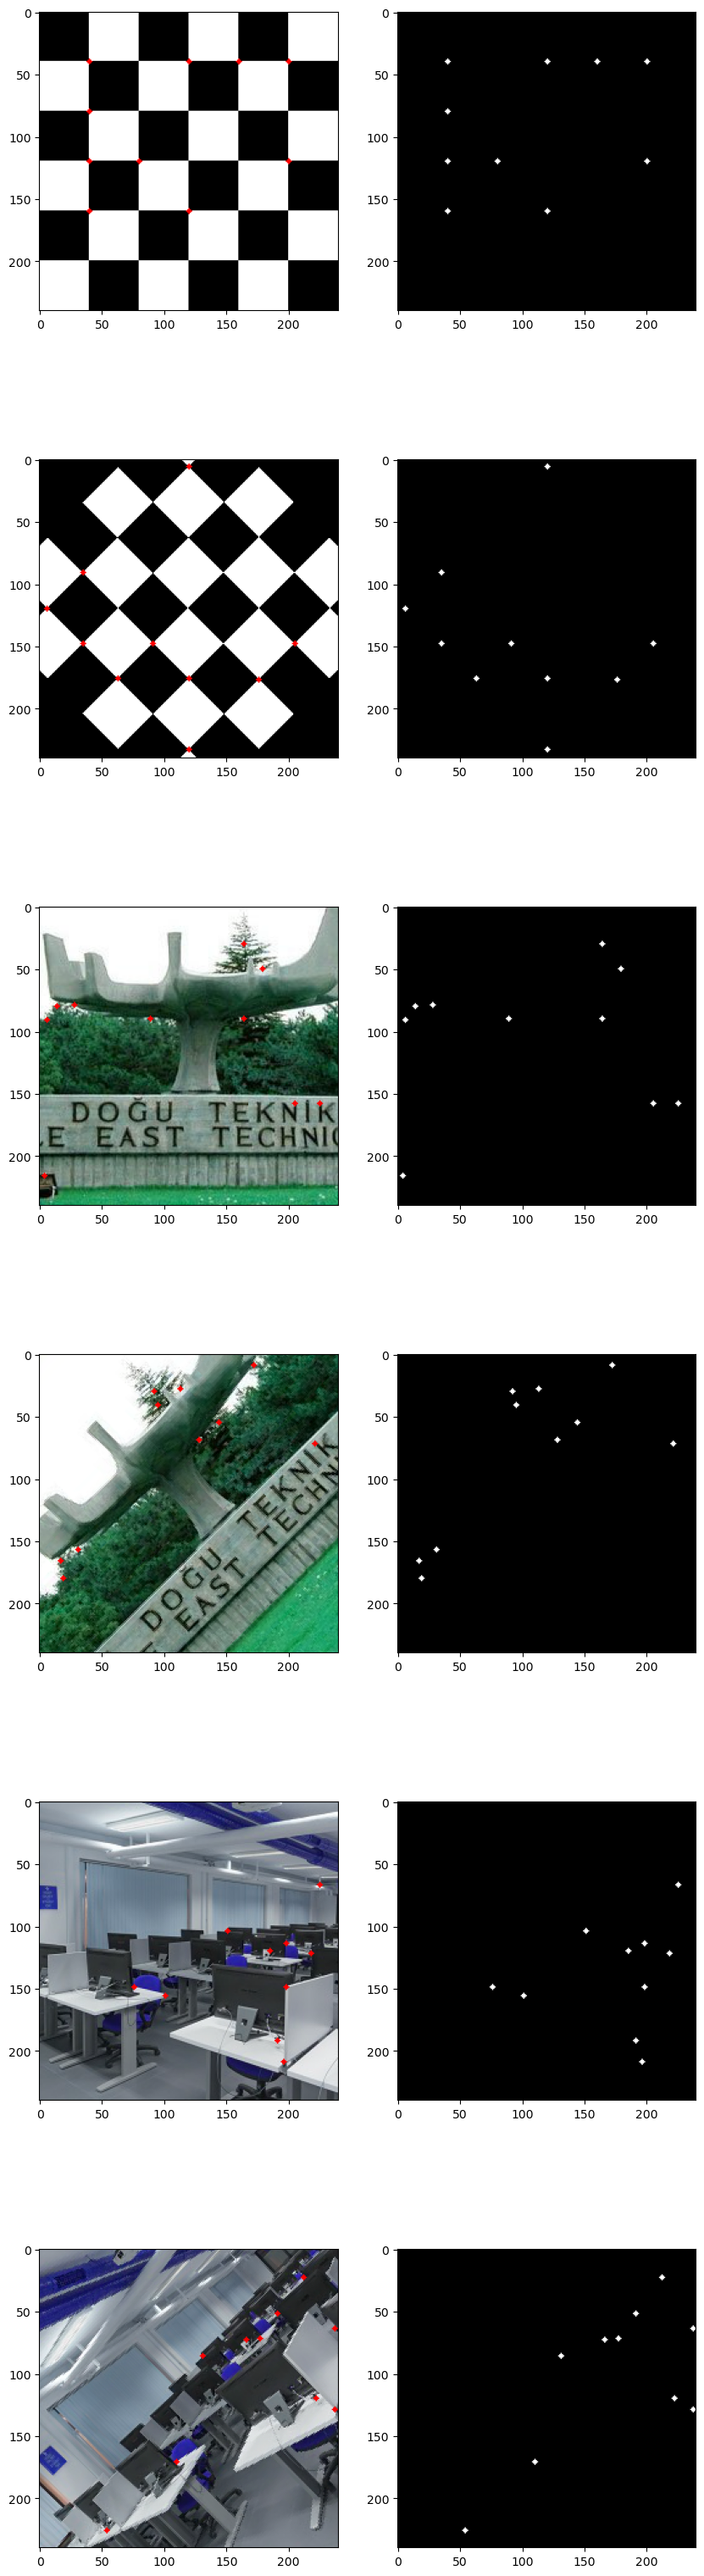

In [59]:
fig = plt.figure(figsize=(10,40))

rows = 6
columns = 2

fig.add_subplot(rows, columns, 1)
time_start = time.time()
im1,im2=task4(chessboard)
plt.imshow(im1)
time_end = time.time()
fig.add_subplot(rows, columns, 2)
plt.imshow(im2)

print('Time Taken For Processing Chessboard %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 3)
time_time_start = time.time()
im3,im4=task4(chessboard_rot)
plt.imshow(im3)
time_end = time.time()
fig.add_subplot(rows, columns, 4)
plt.imshow(im4)
print('Time Taken For Processing Rotated Chessboard %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 5)
time_start = time.time()
im5,im6=task4(agac)
plt.imshow(im5)
time_end = time.time()
fig.add_subplot(rows, columns, 6)
plt.imshow(im6)

print('Time Taken For Processing Agac %f' % (time_end-time_start))


fig.add_subplot(rows, columns, 7)
time_start = time.time()
im7,im8=task4(agac_rot)
plt.imshow(im7)
time_end = time.time()
fig.add_subplot(rows, columns, 8)
plt.imshow(im8)

print('Time Taken For Processing Rotated Agac %f' % (time_end-time_start))


fig.add_subplot(rows, columns, 9)
time_start = time.time()
im9,im10=task4(lab)
plt.imshow(im9)
time_end = time.time()
fig.add_subplot(rows, columns, 10)
plt.imshow(im10)

print('Time Taken For Processing Lab %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 11)
time_start = time.time()
im11,im12=task4(lab_rot)
plt.imshow(im11)
time_end = time.time()
fig.add_subplot(rows, columns, 12)
plt.imshow(im12)

print('Time Taken For Processing Rotated Lab %f' % (time_end-time_start))

##### There is no Overlapping in results due to use of maximum supression. Method is faster on average then previous ones. Slightly invariant to rotation. however more accurate corners found



### Task 5: R function as corner score + Uniform Weighting + Non-Maximum Suppression

In [61]:
def task5(original_img):
    
    img_copy = original_img.copy()
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    black_image = np.zeros((gray.shape[0], gray.shape[1], 3), np.uint8)
    filter_x = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])
    filter_y = np.array([
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]
    ])
    filter_x=filter_x/3
    filter_y=filter_y/3
    dx=convolve2d(gray,filter_x,mode="same",boundary="symm")
    dy=convolve2d(gray,filter_y,mode="same",boundary="symm")
    Sxx=np.square(dx)
    Syy=np.square(dy)
    Sxy=dx*dy
    
    harris = np.zeros(gray.shape)
    directions = [(1, 1), (1, 0), (1, -1), (0, 1), (0, -1), (-1, 1), (-1, 0), (-1, -1)]
    for y in range(2,len(gray)-2):
        for x in range(2,len(gray[0])-2):
            E_total = 0
            Ixx=np.sum(Sxx[y-1:y+2, x-1:x+2])
            Iyy=np.sum(Syy[y-1:y+2, x-1:x+2])
            Ixy=np.sum(Sxy[y-1:y+2, x-1:x+2])
            Matrix_H=np.array([[Ixx,Ixy],[Ixy,Iyy]])
            det = np.linalg.det(Matrix_H)
            trace_squared = np.square(np.trace(Matrix_H))
            harris[y][x] = det - 0.04 * trace_squared

    harris=non_max(harris,10)    
    flat_image = harris.flatten()
    corner_indices_1d = np.argsort(flat_image)[-10:]
    x_indices, y_indices = np.unravel_index(corner_indices_1d, harris.shape)
    for x, y, in zip(x_indices, y_indices):
        cv2.circle(img_copy, (y,x), 2, (255, 0, 0), -1)
        cv2.circle(black_image, (y,x), 2, (255, 255, 255), -1)
    
    return img_copy,black_image

Time Taken For Processing Chessboard 14.626776
Time Taken For Processing Rotated Chessboard 28.470336
Time Taken For Processing Agac 10.934376
Time Taken For Processing Rotated Agac 12.114316
Time Taken For Processing Lab 14.073570
Time Taken For Processing Rotated Lab 13.121843


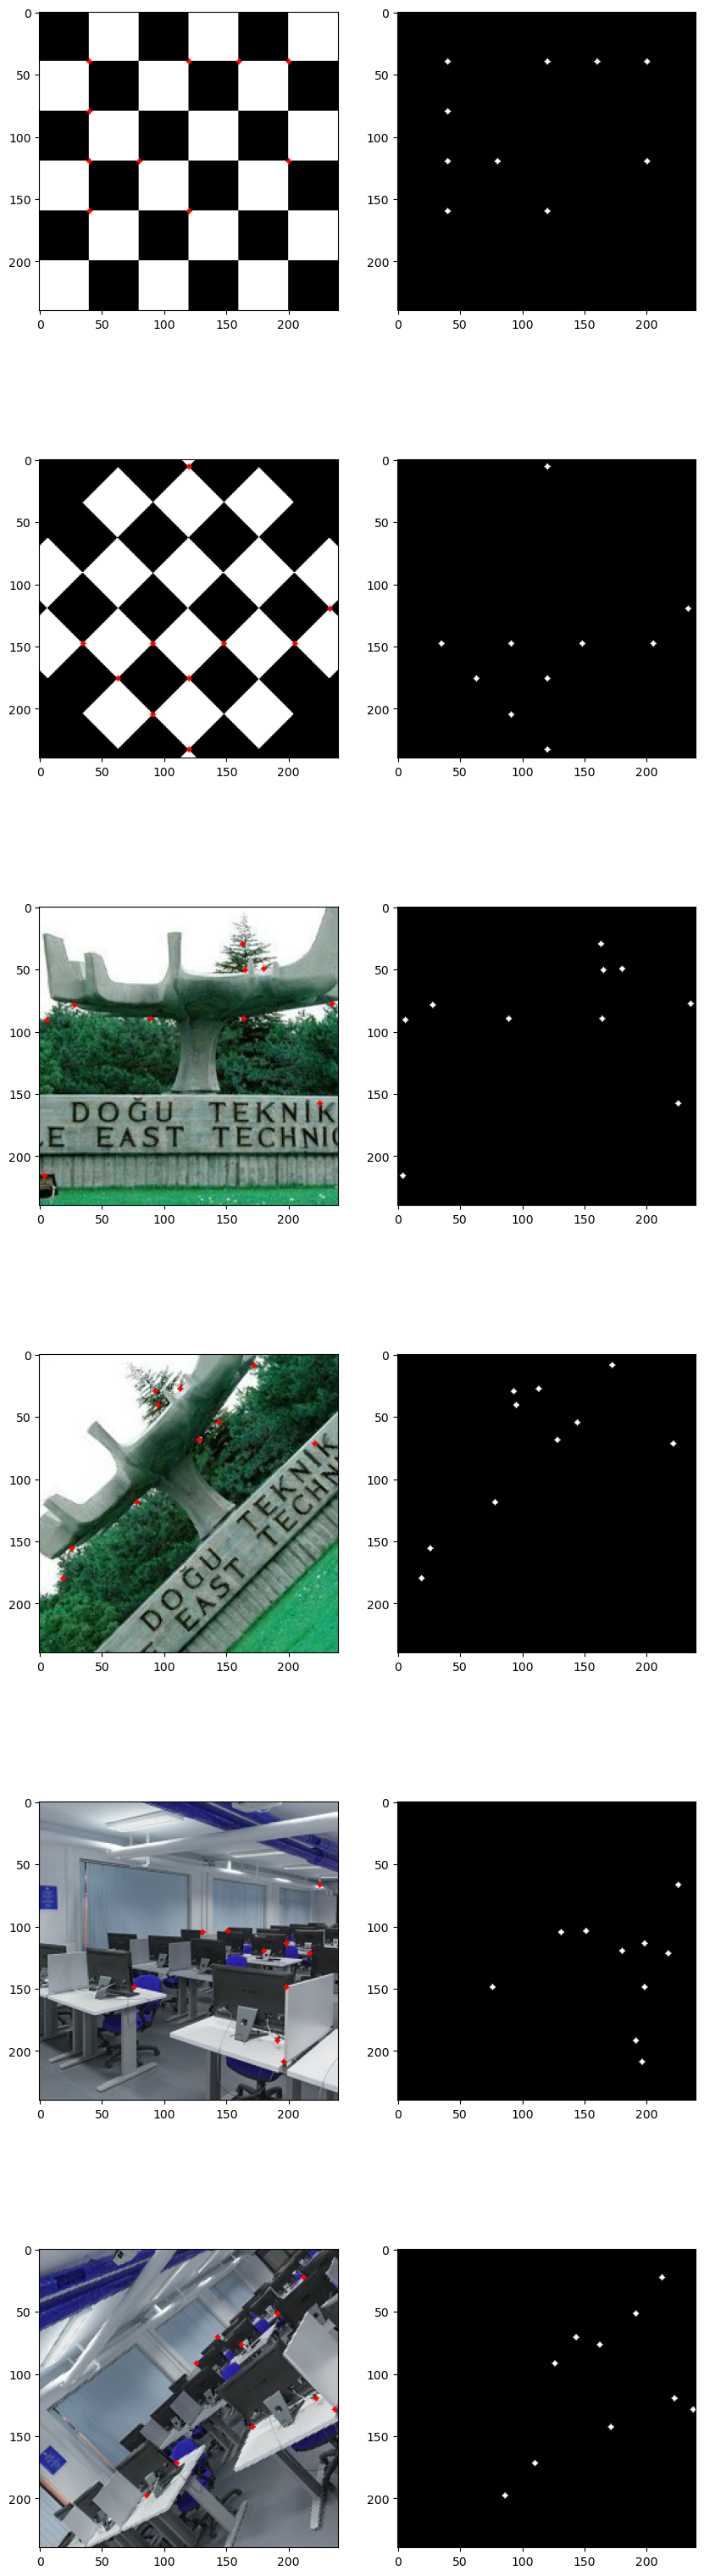

In [62]:
fig = plt.figure(figsize=(10,40))

rows = 6
columns = 2

fig.add_subplot(rows, columns, 1)
time_start = time.time()
im1,im2=task5(chessboard)
plt.imshow(im1)
time_end = time.time()
fig.add_subplot(rows, columns, 2)
plt.imshow(im2)

print('Time Taken For Processing Chessboard %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 3)
time_time_start = time.time()
im3,im4=task5(chessboard_rot)
plt.imshow(im3)
time_end = time.time()
fig.add_subplot(rows, columns, 4)
plt.imshow(im4)
print('Time Taken For Processing Rotated Chessboard %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 5)
time_start = time.time()
im5,im6=task5(agac)
plt.imshow(im5)
time_end = time.time()
fig.add_subplot(rows, columns, 6)
plt.imshow(im6)

print('Time Taken For Processing Agac %f' % (time_end-time_start))


fig.add_subplot(rows, columns, 7)
time_start = time.time()
im7,im8=task5(agac_rot)
plt.imshow(im7)
time_end = time.time()
fig.add_subplot(rows, columns, 8)
plt.imshow(im8)

print('Time Taken For Processing Rotated Agac %f' % (time_end-time_start))


fig.add_subplot(rows, columns, 9)
time_start = time.time()
im9,im10=task5(lab)
plt.imshow(im9)
time_end = time.time()
fig.add_subplot(rows, columns, 10)
plt.imshow(im10)

print('Time Taken For Processing Lab %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 11)
time_start = time.time()
im11,im12=task5(lab_rot)
plt.imshow(im11)
time_end = time.time()
fig.add_subplot(rows, columns, 12)
plt.imshow(im12)

print('Time Taken For Processing Rotated Lab %f' % (time_end-time_start))

##### There is no Overlapping in results due to use of maximum supression. Method is faster on average then previous ones.Slightly InVariant to rotation. More accurate corners found, mostly corners are similar in rotation

### Task 6: R function with fast windowing based on fitering + Uniform Weighting + Non-Maximum Suppression

In [64]:
def task6(original_img):
    
    img_copy = original_img.copy()
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    black_image = np.zeros((gray.shape[0], gray.shape[1], 3), np.uint8)
    filter_x = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])
    filter_y = np.array([
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]
    ])
    filter_x=filter_x/3
    filter_y=filter_y/3
    dx=convolve2d(gray,filter_x,mode="same",boundary="symm")
    dy=convolve2d(gray,filter_y,mode="same",boundary="symm")
    Sxx=np.square(dx)
    Syy=np.square(dy)
    Sxy=dx*dy
    harris = np.zeros(gray.shape)
    uniform_matrix=np.ones((3,3))
    Ixx=convolve2d(Sxx,uniform_matrix,mode="same",boundary="symm")
    Iyy=convolve2d(Syy,uniform_matrix,mode="same",boundary="symm")
    Ixy=convolve2d(Sxy,uniform_matrix,mode="same",boundary="symm")
    det=Ixx*Iyy-(Ixy*Ixy)
    trace_squared=np.square(Ixx+Iyy)
    harris = det - 0.04 * trace_squared
    harris=non_max(harris,10)

    
    
    flat_image = harris.flatten()
    corner_indices_1d = np.argsort(flat_image)[-10:]
    x_indices, y_indices = np.unravel_index(corner_indices_1d, harris.shape)
    for x, y, in zip(x_indices, y_indices):
        cv2.circle(img_copy, (y,x), 2, (255, 0, 0), -1)
        cv2.circle(black_image, (y,x), 2, (255, 255, 255), -1)
    
    return img_copy,black_image

Time Taken For Processing Chessboard 11.425753
Time Taken For Processing Rotated Chessboard 22.304109
Time Taken For Processing Agac 10.214161
Time Taken For Processing Rotated Agac 10.671098
Time Taken For Processing Lab 9.326312
Time Taken For Processing Rotated Lab 11.351711


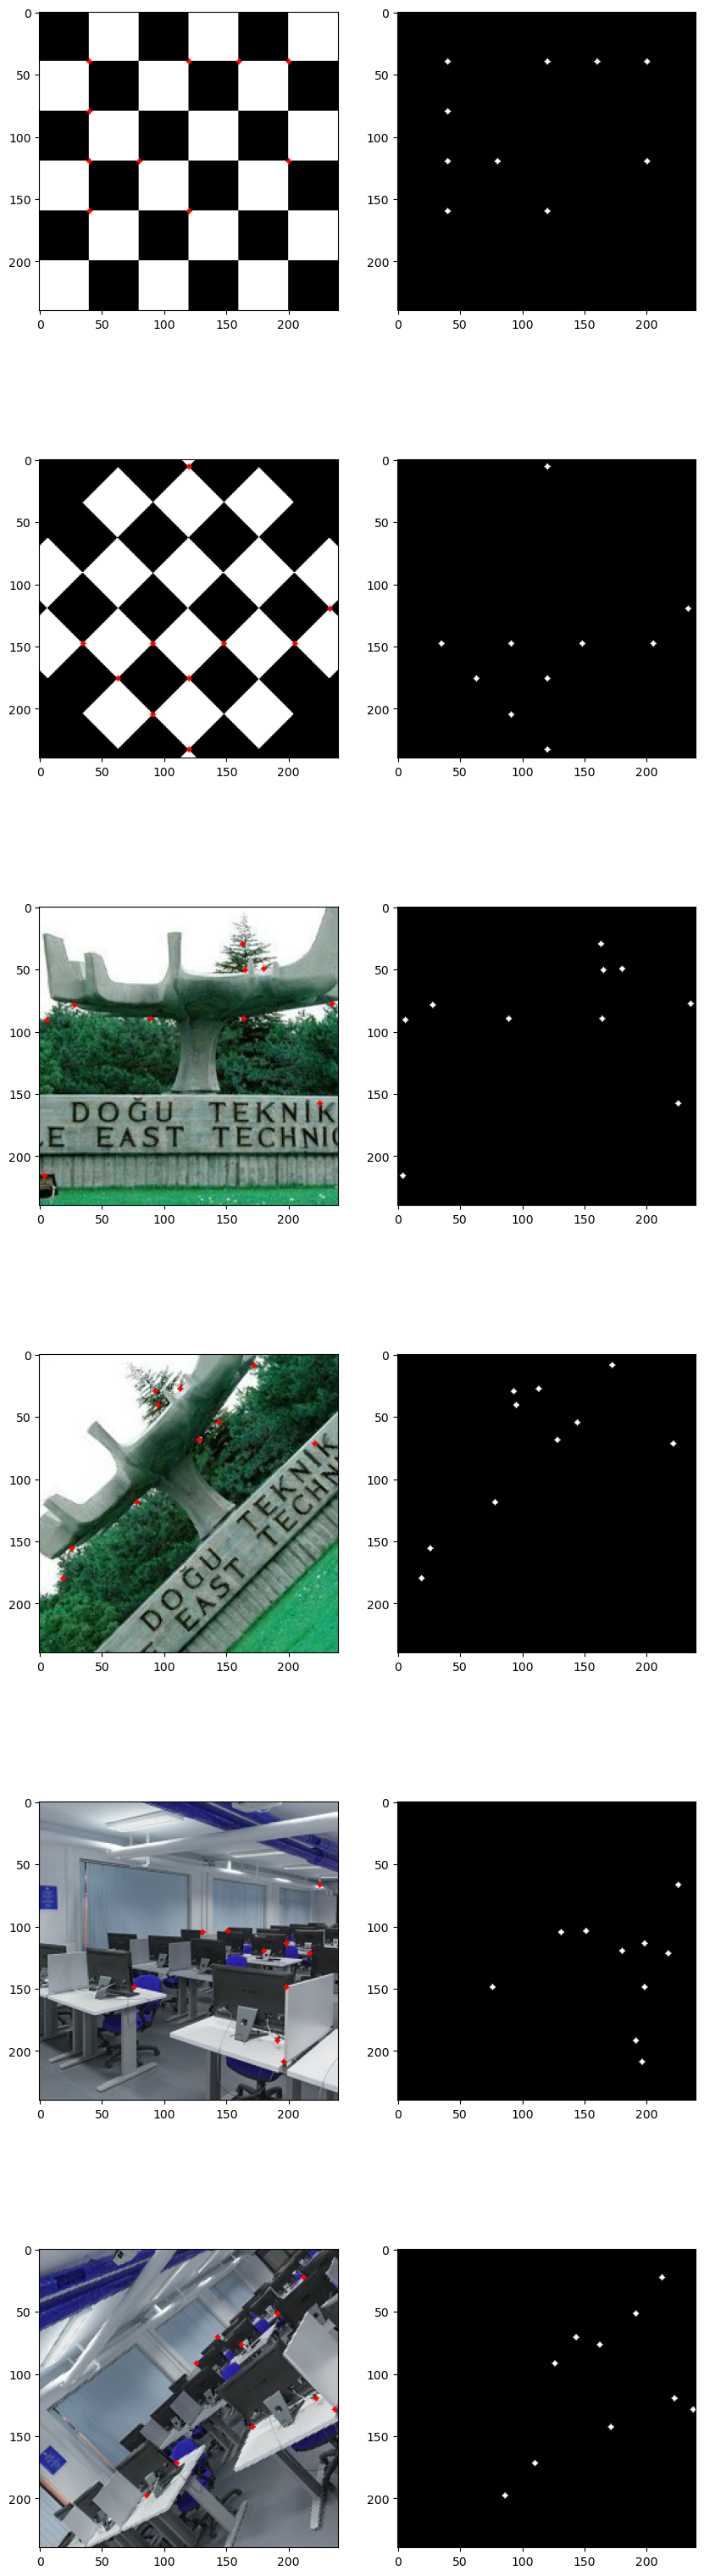

In [65]:
fig = plt.figure(figsize=(10,40))

rows = 6
columns = 2

fig.add_subplot(rows, columns, 1)
time_start = time.time()
im1,im2=task6(chessboard)
plt.imshow(im1)
time_end = time.time()
fig.add_subplot(rows, columns, 2)
plt.imshow(im2)

print('Time Taken For Processing Chessboard %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 3)
time_time_start = time.time()
im3,im4=task6(chessboard_rot)
plt.imshow(im3)
time_end = time.time()
fig.add_subplot(rows, columns, 4)
plt.imshow(im4)
print('Time Taken For Processing Rotated Chessboard %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 5)
time_start = time.time()
im5,im6=task6(agac)
plt.imshow(im5)
time_end = time.time()
fig.add_subplot(rows, columns, 6)
plt.imshow(im6)

print('Time Taken For Processing Agac %f' % (time_end-time_start))


fig.add_subplot(rows, columns, 7)
time_start = time.time()
im7,im8=task6(agac_rot)
plt.imshow(im7)
time_end = time.time()
fig.add_subplot(rows, columns, 8)
plt.imshow(im8)

print('Time Taken For Processing Rotated Agac %f' % (time_end-time_start))


fig.add_subplot(rows, columns, 9)
time_start = time.time()
im9,im10=task6(lab)
plt.imshow(im9)
time_end = time.time()
fig.add_subplot(rows, columns, 10)
plt.imshow(im10)

print('Time Taken For Processing Lab %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 11)
time_start = time.time()
im11,im12=task6(lab_rot)
plt.imshow(im11)
time_end = time.time()
fig.add_subplot(rows, columns, 12)
plt.imshow(im12)

print('Time Taken For Processing Rotated Lab %f' % (time_end-time_start))

##### There is no Overlapping in results due to use of maximum supression. Method is Considerably faster on average then previous ones due to no use of windows. Variant to rotation. More accurate corners found.


### Task 7: R function with fast windowing based on fitering + Gaussian Weighting + Non-Maximum Suppression

In [67]:
def task7(original_img):
    
    img_copy = original_img.copy()
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    black_image = np.zeros((gray.shape[0], gray.shape[1], 3), np.uint8)
    filter_x = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])
    filter_y = np.array([
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]
    ])
    filter_x=filter_x/3
    filter_y=filter_y/3
    dx=convolve2d(gray,filter_x,mode="same",boundary="symm")
    dy=convolve2d(gray,filter_y,mode="same",boundary="symm")
    Sxx=np.square(dx)
    Syy=np.square(dy)
    Sxy=dx*dy
    harris = np.zeros(gray.shape)
    gaussian_kernel = cv2.getGaussianKernel(3, 1)
    # Convolve with the gaussian kernel
    Ixx = convolve2d(Sxx, gaussian_kernel, mode='same', boundary='symm')
    Iyy = convolve2d(Syy, gaussian_kernel, mode='same', boundary='symm')
    Ixy = convolve2d(Sxy, gaussian_kernel, mode='same', boundary='symm')
    det=Ixx*Iyy-(Ixy*Ixy)
    trace_squared=np.square(Ixx+Iyy)
    harris = det - 0.04 * trace_squared
    harris=non_max(harris,10)

    
    
    flat_image = harris.flatten()
    corner_indices_1d = np.argsort(flat_image)[-10:]
    x_indices, y_indices = np.unravel_index(corner_indices_1d, harris.shape)
    for x, y, in zip(x_indices, y_indices):
        cv2.circle(img_copy, (y,x), 2, (255, 0, 0), -1)
        cv2.circle(black_image, (y,x), 2, (255, 255, 255), -1)
    
    return img_copy,black_image

Time Taken For Processing Chessboard 11.835675
Time Taken For Processing Rotated Chessboard 25.629357
Time Taken For Processing Agac 8.907386
Time Taken For Processing Rotated Agac 10.211034
Time Taken For Processing Lab 7.536678
Time Taken For Processing Rotated Lab 9.036832


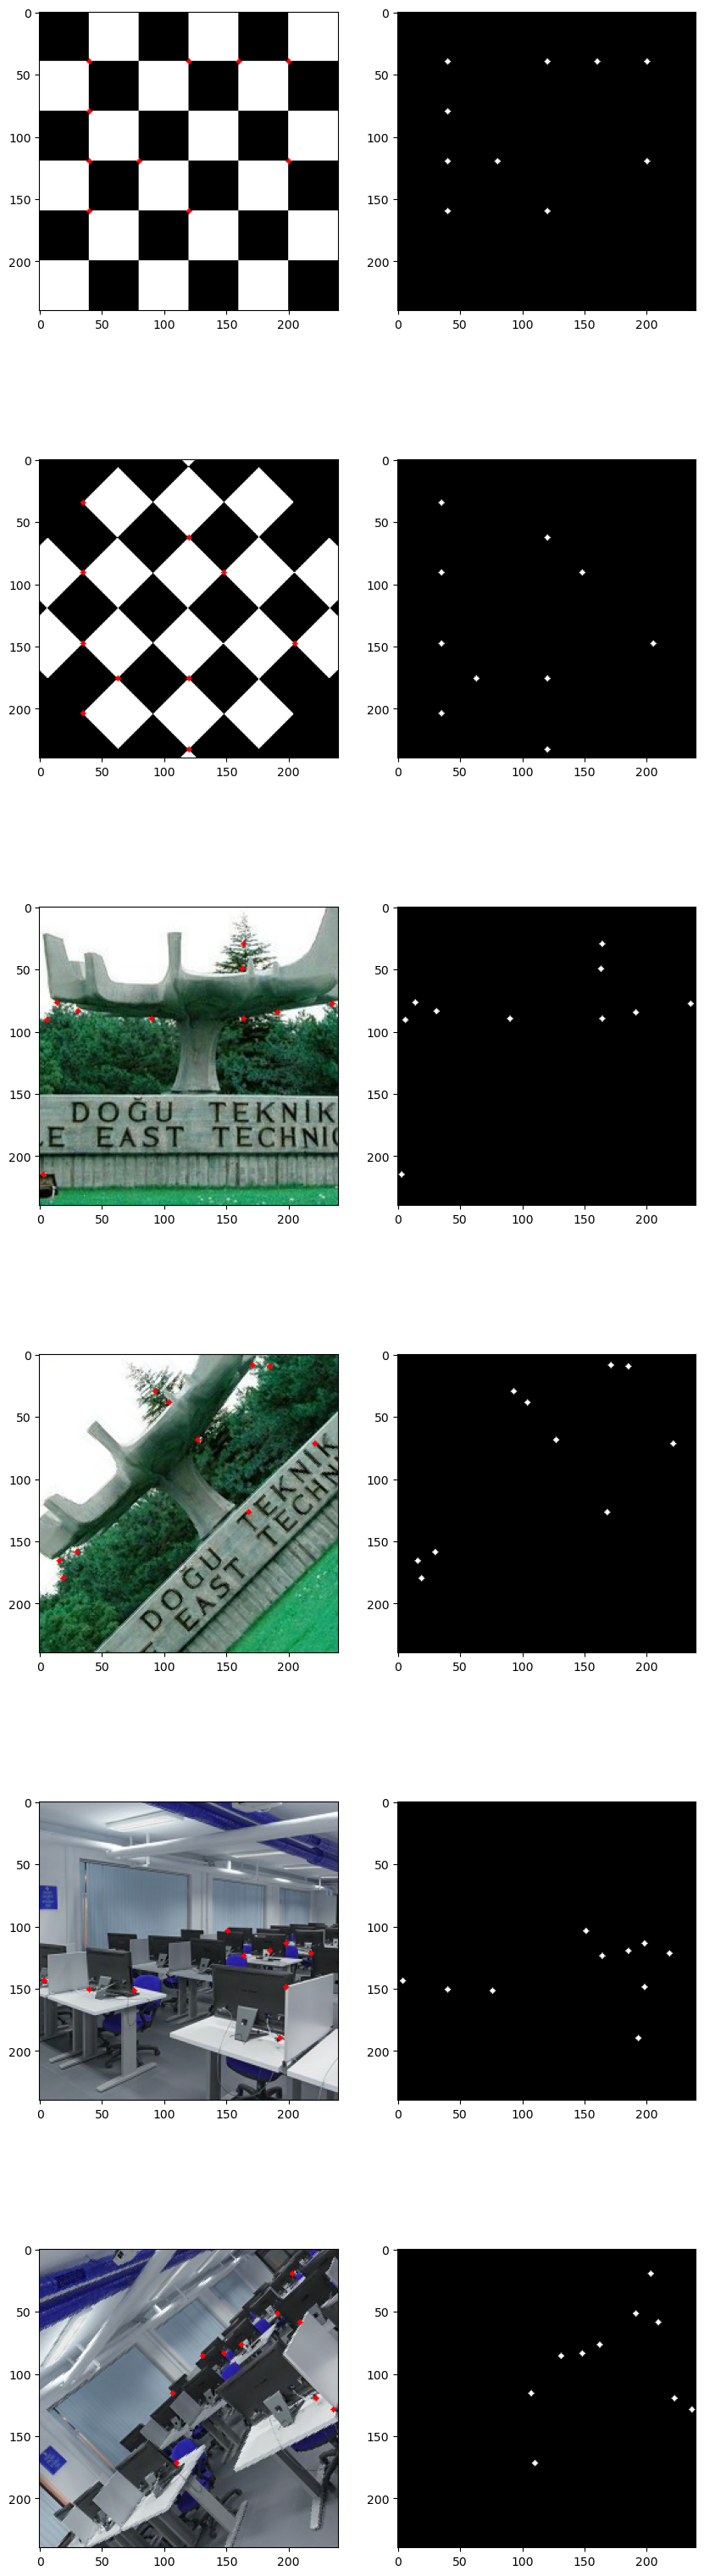

In [68]:
fig = plt.figure(figsize=(10,40))

rows = 6
columns = 2

fig.add_subplot(rows, columns, 1)
time_start = time.time()
im1,im2=task7(chessboard)
plt.imshow(im1)
time_end = time.time()
fig.add_subplot(rows, columns, 2)
plt.imshow(im2)

print('Time Taken For Processing Chessboard %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 3)
time_time_start = time.time()
im3,im4=task7(chessboard_rot)
plt.imshow(im3)
time_end = time.time()
fig.add_subplot(rows, columns, 4)
plt.imshow(im4)
print('Time Taken For Processing Rotated Chessboard %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 5)
time_start = time.time()
im5,im6=task7(agac)
plt.imshow(im5)
time_end = time.time()
fig.add_subplot(rows, columns, 6)
plt.imshow(im6)

print('Time Taken For Processing Agac %f' % (time_end-time_start))


fig.add_subplot(rows, columns, 7)
time_start = time.time()
im7,im8=task7(agac_rot)
plt.imshow(im7)
time_end = time.time()
fig.add_subplot(rows, columns, 8)
plt.imshow(im8)

print('Time Taken For Processing Rotated Agac %f' % (time_end-time_start))


fig.add_subplot(rows, columns, 9)
time_start = time.time()
im9,im10=task7(lab)
plt.imshow(im9)
time_end = time.time()
fig.add_subplot(rows, columns, 10)
plt.imshow(im10)

print('Time Taken For Processing Lab %f' % (time_end-time_start))

fig.add_subplot(rows, columns, 11)
time_start = time.time()
im11,im12=task7(lab_rot)
plt.imshow(im11)
time_end = time.time()
fig.add_subplot(rows, columns, 12)
plt.imshow(im12)

print('Time Taken For Processing Rotated Lab %f' % (time_end-time_start))

##### There is no Overlapping in results due to use of maximum supression. Method is fastest on average then previous ones.Perfectly Invariant to rotation.
